In [143]:
import numpy as np 
from sklearn import linear_model
from sklearn.metrics import r2_score
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/car details v4.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv


In [144]:
df=pd.read_csv("/kaggle/input/vehicle-dataset-from-cardekho/car details v4.csv")

In [145]:
df

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


In [146]:
df.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2.059000e+03,2059.000000,2.059000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,1.702992e+06,2016.425449,5.422471e+04,4280.860652,1767.991980,1591.735338,5.306266,52.002210
std,2.419881e+06,3.363564,5.736172e+04,442.458507,135.265825,136.073956,0.822170,15.110198
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,4.849990e+05,2014.000000,2.900000e+04,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1.925000e+06,2019.000000,7.200000e+04,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [148]:
sdf=df[["Price","Year","Kilometer","Seating Capacity"]]

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Year'}>],
       [<Axes: title={'center': 'Kilometer'}>,
        <Axes: title={'center': 'Seating Capacity'}>]], dtype=object)

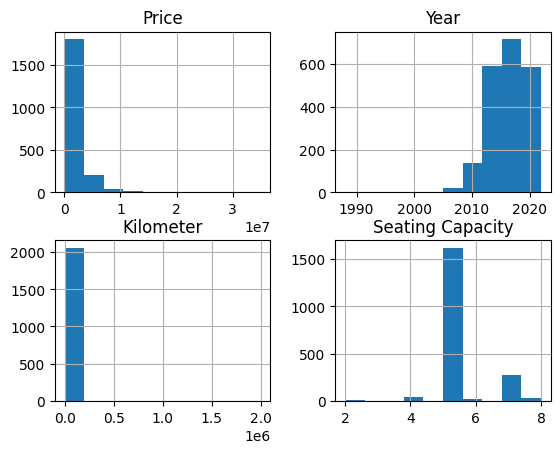

In [149]:
sdf.hist()

Text(0, 0.5, 'Price')

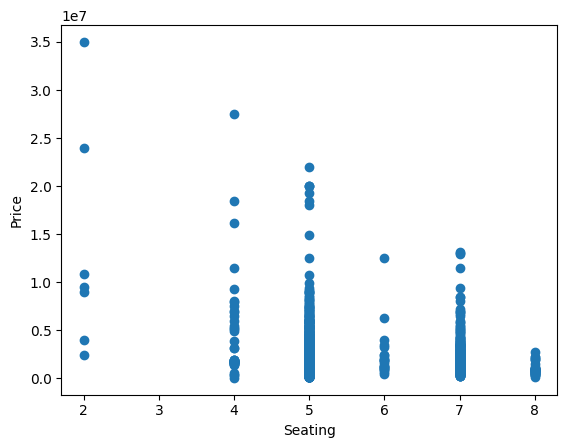

In [150]:
plt.scatter(x=sdf["Seating Capacity"],y=sdf.Price)
plt.xlabel("Seating")
plt.ylabel("Price")

Text(0, 0.5, 'price')

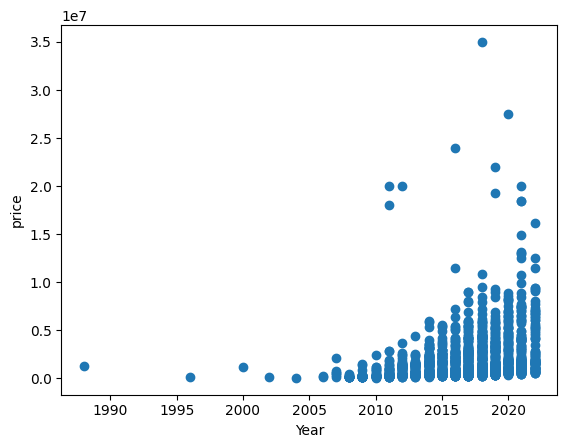

In [151]:
plt.scatter(x=sdf["Year"],y=sdf.Price)
plt.xlabel("Year")
plt.ylabel("price")

In [152]:
sdf.isnull().sum()

Price                0
Year                 0
Kilometer            0
Seating Capacity    64
dtype: int64

In [153]:
sdf=sdf.dropna()

In [154]:
X=sdf.drop("Price",axis=1)
y=sdf["Price"]

# Linear Regression

In [155]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=818)

In [156]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [157]:
li_regr = linear_model.LinearRegression()
li_regr.fit(X_train,y_train)

LinearRegression()

In [158]:
prediction=li_regr.predict(X_test)
print("MEAN ABSOLUTE ERROR: %.2f" %np.mean(np.absolute(prediction - y_test)))
print("Residual sum of squares %.2f" % np.mean((prediction-y_test)**2))
print("R2-score:%.2f"%r2_score(y_test,prediction))

MEAN ABSOLUTE ERROR: 1304758.46
Residual sum of squares 4043109870166.92
R2-score:0.07


In [159]:
newsdf=df[["Price","Length","Width","Seating Capacity"]]

In [160]:
newsdf=newsdf.dropna(how="any")

In [161]:
X=newsdf.drop("Price",axis=1)
y=newsdf["Price"]

In [165]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=818)

In [166]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [167]:
li_regr = linear_model.LinearRegression()
li_regr.fit(X_train,y_train)

LinearRegression()

In [168]:
prediction=li_regr.predict(X_test)
print("MEAN ABSOLUTE ERROR: %.2f" %np.mean(np.absolute(prediction - y_test)))
print("Residual sum of squares %.2f" % np.mean((prediction-y_test)**2))
print("R2-score:%.2f"%r2_score(y_test,prediction))

MEAN ABSOLUTE ERROR: 1084532.81
Residual sum of squares 2705936520555.84
R2-score:0.38


# we can also run just this method and try a lot of dataframes too 

In [172]:
def linear_reg_model(dataframe,label):
    dataframe=dataframe.dropna(how="any")
    X=dataframe.drop(label,axis=1)
    y=dataframe[label]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=818)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    li_regr = linear_model.LinearRegression()
    li_regr.fit(X_train,y_train)
    prediction=li_regr.predict(X_test)
    print("MEAN ABSOLUTE ERROR: %.2f" %np.mean(np.absolute(prediction - y_test)))
    print("Residual sum of squares %.2f" % np.mean((prediction-y_test)**2))
    print("R2-score:%.2f"%r2_score(y_test,prediction))
    return li_regr
print(linear_reg_model(sdf,"Price"))

MEAN ABSOLUTE ERROR: 1304758.46
Residual sum of squares 4043109870166.92
R2-score:0.07
LinearRegression()
